<a href="https://colab.research.google.com/github/miftah-stat/Machine-Learning-dengan-Phyton/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data (csv file)

In [3]:
Heart=pd.read_csv('/content/Heart3.csv', sep=',')

# Data Preview

In [4]:
Heart.head()

,Age,Gender,ChestPain,BloodPressure,Cholesterol,BloodSugar,Electrocardiographic,HeartRate,Exang,ST,slope,Vessel,Thalassemia,HeartDisease
0,63,M,typical angina,145,233,>120,hyperthropy,150,no,2.3,down,0,fixed defect,no
1,67,M,asymptotic,160,286,<=120,hyperthropy,108,yes,1.5,flat,3,normal,yes
2,67,M,asymptotic,120,229,<=120,hyperthropy,129,yes,2.6,flat,2,reversible defect,yes
3,37,M,non-anginal pain,130,250,<=120,normal,187,no,3.5,down,0,normal,no
4,41,F,atypical angina,130,204,<=120,hyperthropy,172,no,1.4,up,0,normal,no


### Data Dimension

In [5]:
Heart.shape

(299, 14)

### Variable Type

In [6]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   299 non-null    int64  
 1   Gender                299 non-null    object 
 2   ChestPain             299 non-null    object 
 3   BloodPressure         299 non-null    int64  
 4   Cholesterol           299 non-null    int64  
 5   BloodSugar            299 non-null    object 
 6   Electrocardiographic  299 non-null    object 
 7   HeartRate             299 non-null    int64  
 8   Exang                 299 non-null    object 
 9   ST                    299 non-null    float64
 10  slope                 299 non-null    object 
 11  Vessel                299 non-null    int64  
 12  Thalassemia           299 non-null    object 
 13  HeartDisease          299 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.8+ KB


### Missing Value

In [7]:
Heart.isnull().sum()

Age                     0
Gender                  0
ChestPain               0
BloodPressure           0
Cholesterol             0
BloodSugar              0
Electrocardiographic    0
HeartRate               0
Exang                   0
ST                      0
slope                   0
Vessel                  0
Thalassemia             0
HeartDisease            0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f56a8147450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f56a811c950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f56a811d350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f56a811d990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f56a811cb10>,
  <matplotlib.lines.Line2D at 0x7f56a811c390>]}

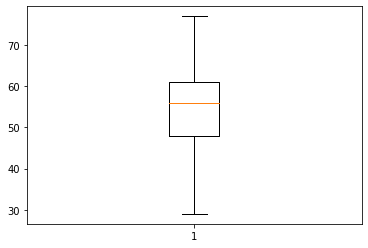

In [30]:
plt.boxplot(Heart.Age)

### Summary Data  (Numeric Variable)

In [8]:
Heart.describe()

,Age,BloodPressure,Cholesterol,HeartRate,ST,Vessel
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.528428,131.668896,247.100334,149.505017,1.051839,0.672241
std,9.020950,17.705668,51.914779,22.954927,1.163809,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### Heart Disease (Target) Distribution

In [9]:
Heart['HeartDisease'].value_counts()

no     161
yes    138
Name: HeartDisease, dtype: int64

In [10]:
Heart['HeartDisease'].value_counts(normalize=True)

no     0.538462
yes    0.461538
Name: HeartDisease, dtype: float64

# Exploratory Data Analysis

### Gender vs Heart Disease

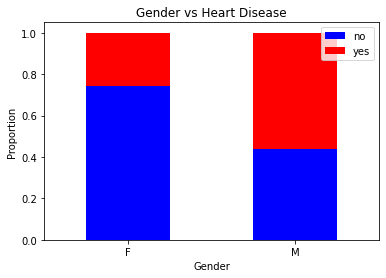

In [13]:
pd.crosstab(Heart['Gender'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Gender vs Heart Disease')
plt.show()

### Chest Pain vs Heart Disease

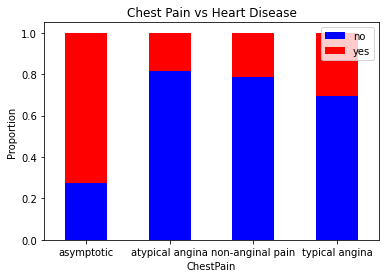

In [14]:
pd.crosstab(Heart['ChestPain'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Chest Pain vs Heart Disease')
plt.show()

### Blood Sugar vs Heart Disease

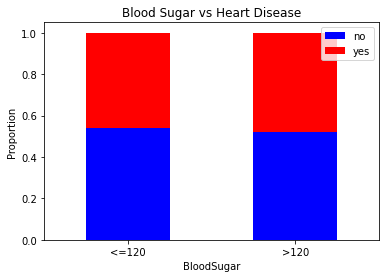

In [15]:
pd.crosstab(Heart['BloodSugar'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Blood Sugar vs Heart Disease')
plt.show()

### Electrocardiographic vs Heart Disease

In [ ]:
pd.crosstab(Heart['Electrocardiographic'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Electrocardiographic vs Heart Disease')
plt.show()

### Exercise Induced Angina vs Heart Disease

In [ ]:
pd.crosstab(Heart['Exang'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Exercise Induced Angina vs Heart Disease')
plt.show()

### ST SLope vs Heart Disease

In [ ]:
pd.crosstab(Heart['slope'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('ST SLope vs Heart Disease')
plt.show()

### Vessel vs Heart Disease

In [ ]:
pd.crosstab(Heart['Vessel'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Vessel vs Heart Disease')
plt.show()

### Thalassemia vs Heart Disease

In [ ]:
pd.crosstab(Heart['Thalassemia'], Heart['HeartDisease'], normalize='index').plot.bar(rot=0, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Thalassemia vs Heart Disease')
plt.show()

### Age vs Heart Disease

In [ ]:
colors = {'no':'b', 'yes':'r'}
Heart.groupby('HeartDisease').Age.plot.density(alpha=0.5, legend=True, color=colors)
plt.title('Age vs Heart Disease')
plt.show()

### Blood Pressure vs Heart Disease

In [ ]:
colors = {'no':'b', 'yes':'r'}
Heart.groupby('HeartDisease').BloodPressure.plot.density(alpha=0.5, legend=True, color=colors)
plt.title('Blood Pressure vs Heart Disease')
plt.show()

### Cholesterol vs Heart Disease

In [ ]:
colors = {'no':'b', 'yes':'r'}
Heart.groupby('HeartDisease').Cholesterol.plot.density(alpha=0.5, legend=True, color=colors)
plt.title('Cholesterol vs Heart Disease')
plt.show()

### Heart Rate vs Heart Disease

In [ ]:
colors = {'no':'b', 'yes':'r'}
Heart.groupby('HeartDisease').HeartRate.plot.density(alpha=0.5, legend=True, color=colors)
plt.title('Heart Rate vs Heart Disease')
plt.show()

### ST vs Heart Disease

In [ ]:
colors = {'no':'b', 'yes':'r'}
Heart.groupby('HeartDisease').ST.plot.density(alpha=0.5, legend=True, color=colors)
plt.title('ST vs Heart Disease')
plt.show()

# Classification Modeling

### Dummy Variable (Categorical Variable)

In [17]:
Heart2 = pd.get_dummies(Heart, columns=['Gender','ChestPain','BloodSugar','Electrocardiographic','Exang','slope','Thalassemia', 'HeartDisease'], drop_first=True)

In [18]:
Heart2.head()

,Age,BloodPressure,Cholesterol,HeartRate,ST,Vessel,Gender_M,ChestPain_atypical angina,ChestPain_non-anginal pain,ChestPain_typical angina,BloodSugar_>120,Electrocardiographic_hyperthropy,Electrocardiographic_normal,Exang_yes,slope_flat,slope_up,Thalassemia_normal,Thalassemia_reversible defect,HeartDisease_yes
0,63,145,233,150,2.3,0,1,0,0,1,1,1,0,0,0,0,0,0,0
1,67,160,286,108,1.5,3,1,0,0,0,0,1,0,1,1,0,1,0,1
2,67,120,229,129,2.6,2,1,0,0,0,0,1,0,1,1,0,0,1,1
3,37,130,250,187,3.5,0,1,0,1,0,0,0,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,0,1,0,0,0,1,0,0,0,1,1,0,0


### Split X dan Y

In [19]:
X = Heart2.drop('HeartDisease_yes',1)
Y = Heart2['HeartDisease_yes']

### Train & Test Split Data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 123)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((239, 18), (60, 18), (239,), (60,))

### Cross-Validation 10 Folds

In [21]:
cv = KFold(n_splits=10, random_state=123, shuffle=True)

## Logistic Regression

In [32]:
logreg = LogisticRegression(C=1e9, penalty='l1', fit_intercept = False, max_iter=10000, solver='liblinear')
scores = cross_val_score(logreg, X_train, Y_train, scoring='accuracy', cv=cv)
print(scores.mean())
print(scores.var())

0.8452898550724637
0.004154983196807392


In [44]:
logit=sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()
logitpred=logit.predict(X_test)
logitclass=(logitpred>0.5).astype(int)
print(logit.summary2())

                       Results: Generalized linear model
Model:                     GLM                   AIC:                 184.9038  
Link Function:             logit                 BIC:                 -1061.3946
Dependent Variable:        HeartDisease_yes      Log-Likelihood:      -74.452   
Date:                      2021-07-03 04:56      LL-Null:             -165.19   
No. Observations:          239                   Deviance:            148.90    
Df Model:                  17                    Pearson chi2:        280.      
Df Residuals:              221                   Scale:               1.0000    
Method:                    IRLS                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Age                              -0.0163   0.0250 -0

In [23]:
logreg.fit(X_train, Y_train)
logregpredict = logreg.predict(X_test)

In [24]:
cm = confusion_matrix(Y_test,logregpredict)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Confusion Matrix : 
 [[31  3]
 [ 8 18]]
Accuracy :  0.8166666666666667
Sensitivity :  0.6923076923076923
Specificity :  0.9117647058823529


## Decision Tree

In [25]:
dt = DecisionTreeClassifier(random_state=123, max_depth=3)
scores = cross_val_score(dt, X_train, Y_train, scoring='accuracy', cv=cv)
print(scores.mean())
print(scores.var())

0.7905797101449276
0.0032262129804662893


In [26]:
dt.fit(X_train, Y_train)
dtpredict = dt.predict(X_test)

In [27]:
cm = confusion_matrix(Y_test,dtpredict)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Confusion Matrix : 
 [[26  8]
 [ 8 18]]
Accuracy :  0.7333333333333333
Sensitivity :  0.6923076923076923
Specificity :  0.7647058823529411


## Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
scores = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=cv)
print(scores.mean())
print(scores.var())

In [ ]:
svm.fit(X_train, Y_train)
svmpredict = svm.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,svmpredict)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=123)
scores = cross_val_score(rf, X_train, Y_train, scoring='accuracy', cv=cv)
print(scores.mean())
print(scores.var())

In [ ]:
rf.fit(X_train, Y_train)
rfpredict = rf.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,rfpredict)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

## Extreme Gradient Boosting

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='error')
scores = cross_val_score(xgb, X_train, Y_train, scoring='accuracy', cv=cv)
print(scores.mean())
print(scores.var())

In [ ]:
xgb.fit(X_train, Y_train)
xgbpredict = xgb.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,xgbpredict)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)